In [1]:
import pandas as pd

iris = pd.read_csv("../iris.data", header=None, names=["sepal_length", "sepal_width", 
                                                    "petal_length", "petal_width", "label"])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X = iris.drop(['label'], axis=1)
y = iris.label

# encode label
y_data = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_data)

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(8, activation='relu', input_dim=4))
model.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, verbose=0, batch_size=10, 
         shuffle=True, validation_data=(X_test, y_test))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
max(history.history['val_acc'])

1.0

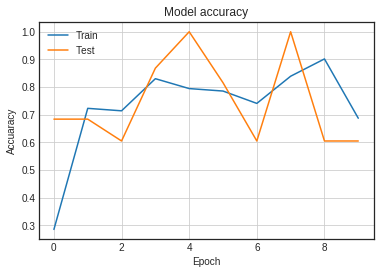

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.grid(True)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model accuracy")
plt.ylabel("Accuaracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Test'], loc='best')
plt.show()

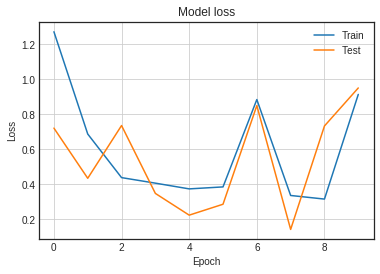

In [10]:
plt.grid(True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [12]:
from keras.utils import plot_model

# plot_model(model, show_shapes=True, to_file="model.png")

In [13]:
from keras.utils import print_summary

print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [14]:
%%!
cd ..
file=$(pwd)"/iris.data"
bin/neuralnet $file 20 2 0.1

['Epoch: 1/20 complete\tTest loss: 0.133305',
 'Epoch: 2/20 complete\tTest loss: 0.128155',
 'Epoch: 3/20 complete\tTest loss: 0.120409',
 'Epoch: 4/20 complete\tTest loss: 0.111765',
 'Epoch: 5/20 complete\tTest loss: 0.108528',
 'Epoch: 6/20 complete\tTest loss: 0.105575',
 'Epoch: 7/20 complete\tTest loss: 0.102621',
 'Epoch: 8/20 complete\tTest loss: 0.099863',
 'Epoch: 9/20 complete\tTest loss: 0.0978409',
 'Epoch: 10/20 complete\tTest loss: 0.0961235',
 'Epoch: 11/20 complete\tTest loss: 0.094568',
 'Epoch: 12/20 complete\tTest loss: 0.0931504',
 'Epoch: 13/20 complete\tTest loss: 0.092302',
 'Epoch: 14/20 complete\tTest loss: 0.0913928',
 'Epoch: 15/20 complete\tTest loss: 0.0903219',
 'Epoch: 16/20 complete\tTest loss: 0.0888419',
 'Epoch: 17/20 complete\tTest loss: 0.0876046',
 'Epoch: 18/20 complete\tTest loss: 0.0864155',
 'Epoch: 19/20 complete\tTest loss: 0.0853201',
 'Epoch: 20/20 complete\tTest loss: 0.0847841',
 '',
 'Accuracy: 0.8333',
 '',
 'Confunsion matrix',
 '10 0